In [0]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
%cd /content/drive/My\ Drive/Colab\ Notebooks/data 
# change directory
%pwd  # Ben neredeyim komutu
!ls    # İçerisinde ne var 

/content/drive/My Drive/Colab Notebooks/data
states_all.csv


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

pd.options.display.float_format = '{:.2f}'.format
warnings.filterwarnings('ignore')

Veri kümesinde yer alan değişkenlerinin tiplerini ve her bir değişkenin eksik (null) değer oranını bulun.

Verimizde yıl (year) sütunu olduğunu farketmişsinizdir. Şimdilik yıl verisini unutun ve her bir gözlemin aynı yıl içerisinde yapıldığını farz edin. Her bir değişken için eksik değerleri nasıl doldurabileceğinizi düşünün. Eksik değerleri bir değerle doldurmak hangi değişkenler için anlamlı, hangileri için anlamsızdır?

Şimdi zaman faktörünü dikkate alma zamanı! 2. sorudaki cevabınızı tekrar gözden geçirin ve eksik verileri o yıl içerisinde gözlemlenen değerlere dayanarak doldurun. Örneğin, bir değeri ortalama değer ile doldurmak isterseniz, o yılın ortalamasını hesaplayın.

Bu sefer, eksik değerleri enterpolasyon yaparak doldurun.

İkinci, üçüncü ve dördüncü sorulardaki cevaplarınızı karşılaştırın. Anlamlı bir fark görebiliyor musunuz?

In [0]:
original_data = pd.read_csv("states_all.csv")
original_data.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,nan,2678885.00,304177.00,1659028.00,715680.00,2653798.00,1481703.00,735036.00,nan,174053.00,8224.00,55460.00,57948.00,58025.00,41167.00,nan,nan,731634.00,208.00,252.00,207.00,nan
1,1992_ALASKA,ALASKA,1992,nan,1049591.00,106780.00,720711.00,222100.00,972488.00,498362.00,350902.00,nan,37451.00,2371.00,10152.00,9748.00,8789.00,6714.00,nan,nan,122487.00,nan,nan,nan,nan
2,1992_ARIZONA,ARIZONA,1992,nan,3258079.00,297888.00,1369815.00,1590376.00,3401580.00,1435908.00,1007732.00,nan,609114.00,2544.00,53497.00,55433.00,49081.00,37410.00,nan,nan,673477.00,215.00,265.00,209.00,nan
3,1992_ARKANSAS,ARKANSAS,1992,nan,1711959.00,178571.00,958785.00,574603.00,1743022.00,964323.00,483488.00,nan,145212.00,808.00,33511.00,34632.00,36011.00,27651.00,nan,nan,441490.00,210.00,256.00,211.00,nan
4,1992_CALIFORNIA,CALIFORNIA,1992,nan,26260025.00,2072470.00,16546514.00,7641041.00,27138832.00,14358922.00,8520926.00,nan,2044688.00,59067.00,431763.00,418418.00,363296.00,270675.00,nan,nan,5254844.00,208.00,261.00,202.00,nan


In [0]:
data=original_data.copy()

In [0]:
data

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,nan,2678885.00,304177.00,1659028.00,715680.00,2653798.00,1481703.00,735036.00,nan,174053.00,8224.00,55460.00,57948.00,58025.00,41167.00,nan,nan,731634.00,208.00,252.00,207.00,nan
1,1992_ALASKA,ALASKA,1992,nan,1049591.00,106780.00,720711.00,222100.00,972488.00,498362.00,350902.00,nan,37451.00,2371.00,10152.00,9748.00,8789.00,6714.00,nan,nan,122487.00,nan,nan,nan,nan
2,1992_ARIZONA,ARIZONA,1992,nan,3258079.00,297888.00,1369815.00,1590376.00,3401580.00,1435908.00,1007732.00,nan,609114.00,2544.00,53497.00,55433.00,49081.00,37410.00,nan,nan,673477.00,215.00,265.00,209.00,nan
3,1992_ARKANSAS,ARKANSAS,1992,nan,1711959.00,178571.00,958785.00,574603.00,1743022.00,964323.00,483488.00,nan,145212.00,808.00,33511.00,34632.00,36011.00,27651.00,nan,nan,441490.00,210.00,256.00,211.00,nan
4,1992_CALIFORNIA,CALIFORNIA,1992,nan,26260025.00,2072470.00,16546514.00,7641041.00,27138832.00,14358922.00,8520926.00,nan,2044688.00,59067.00,431763.00,418418.00,363296.00,270675.00,nan,nan,5254844.00,208.00,261.00,202.00,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1710,2019_VIRGINIA,VIRGINIA,2019,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,247.00,287.00,224.00,262.00
1711,2019_WASHINGTON,WASHINGTON,2019,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,240.00,286.00,220.00,266.00
1712,2019_WEST_VIRGINIA,WEST_VIRGINIA,2019,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,231.00,272.00,213.00,256.00
1713,2019_WISCONSIN,WISCONSIN,2019,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,242.00,289.00,220.00,267.00


In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1715 entries, 0 to 1714
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PRIMARY_KEY                   1715 non-null   object 
 1   STATE                         1715 non-null   object 
 2   YEAR                          1715 non-null   int64  
 3   ENROLL                        1224 non-null   float64
 4   TOTAL_REVENUE                 1275 non-null   float64
 5   FEDERAL_REVENUE               1275 non-null   float64
 6   STATE_REVENUE                 1275 non-null   float64
 7   LOCAL_REVENUE                 1275 non-null   float64
 8   TOTAL_EXPENDITURE             1275 non-null   float64
 9   INSTRUCTION_EXPENDITURE       1275 non-null   float64
 10  SUPPORT_SERVICES_EXPENDITURE  1275 non-null   float64
 11  OTHER_EXPENDITURE             1224 non-null   float64
 12  CAPITAL_OUTLAY_EXPENDITURE    1275 non-null   float64
 13  GRA

In [0]:
data.describe()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,1715.00,1224.00,1275.00,1275.00,1275.00,1275.00,1275.00,1275.00,1275.00,1224.00,1275.00,1542.00,1632.00,1632.00,1632.00,1632.00,1020.00,1071.00,1632.00,565.00,602.00,650.00,562.00
mean,2002.08,917541.57,9102044.93,767779.86,4223742.90,4110522.16,9206242.12,4768010.48,2682586.52,429950.93,903467.45,17840.96,68810.96,69166.51,68106.54,58420.87,577954.72,282069.08,913969.49,236.33,278.28,218.81,263.56
std,9.57,1066514.20,11759620.23,1146991.51,5549734.82,5489561.97,11992791.01,6300569.34,3357214.50,534789.31,1329473.47,30016.60,80671.03,79957.99,77965.85,67438.53,675783.66,330709.79,1055892.95,9.29,10.34,7.68,6.61
min,1986.00,43866.00,465650.00,31020.00,0.00,22093.00,481665.00,265549.00,139963.00,11541.00,12708.00,96.00,5122.00,4577.00,3371.00,2572.00,37698.00,13530.00,68449.00,192.00,231.00,179.00,236.00
25%,1994.00,264514.50,2189503.50,189957.50,1165776.00,715121.00,2170404.00,1171336.50,638076.00,103449.25,181507.00,2199.75,19029.75,18971.50,19594.25,16076.50,164925.00,80608.00,248083.25,232.00,272.00,215.00,260.00
50%,2002.00,649933.50,5085826.00,403548.00,2537754.00,2058996.00,5242672.00,2658253.00,1525471.00,271704.00,510428.00,8258.00,48122.00,49087.00,47880.00,39408.00,405111.50,186919.00,645805.00,238.00,280.50,220.00,265.00
75%,2010.00,1010532.00,10845163.00,827932.00,5055547.50,4755293.00,10744201.50,5561959.00,3222924.50,517222.25,966148.00,22691.75,78864.25,78504.25,78976.00,69397.25,643975.25,322328.00,1043420.50,242.00,286.00,224.00,268.00
max,2019.00,6307022.00,89217262.00,9990221.00,50904567.00,36105265.00,85320133.00,43964520.00,26058021.00,3995951.00,10223657.00,256222.00,535379.00,493415.00,500143.00,498403.00,3929869.00,2013687.00,6441557.00,253.00,301.00,237.00,280.00


In [0]:
data.isnull().sum()*100/data.isnull().count()

PRIMARY_KEY                     0.00
STATE                           0.00
YEAR                            0.00
ENROLL                         28.63
TOTAL_REVENUE                  25.66
FEDERAL_REVENUE                25.66
STATE_REVENUE                  25.66
LOCAL_REVENUE                  25.66
TOTAL_EXPENDITURE              25.66
INSTRUCTION_EXPENDITURE        25.66
SUPPORT_SERVICES_EXPENDITURE   25.66
OTHER_EXPENDITURE              28.63
CAPITAL_OUTLAY_EXPENDITURE     25.66
GRADES_PK_G                    10.09
GRADES_KG_G                     4.84
GRADES_4_G                      4.84
GRADES_8_G                      4.84
GRADES_12_G                     4.84
GRADES_1_8_G                   40.52
GRADES_9_12_G                  37.55
GRADES_ALL_G                    4.84
AVG_MATH_4_SCORE               67.06
AVG_MATH_8_SCORE               64.90
AVG_READING_4_SCORE            62.10
AVG_READING_8_SCORE            67.23
dtype: float64

In [0]:
data.loc[:,'ENROLL'].fillna(data.loc[:,'ENROLL'].mean(),inplace=True)

In [0]:
fill_list = ["ENROLL", "TOTAL_REVENUE", "FEDERAL_REVENUE",
             "STATE_REVENUE", "LOCAL_REVENUE", "TOTAL_EXPENDITURE",
             "INSTRUCTION_EXPENDITURE", "SUPPORT_SERVICES_EXPENDITURE",
             "OTHER_EXPENDITURE", "CAPITAL_OUTLAY_EXPENDITURE", "GRADES_PK_G",
             "GRADES_KG_G", "GRADES_4_G", "GRADES_8_G", "GRADES_12_G", "GRADES_1_8_G",
             "GRADES_9_12_G", "GRADES_ALL_G"]
for col in fill_list:
    data.loc[:, col].fillna(data.loc[:, col].mean(), inplace=True)

In [0]:
data

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,917541.57,2678885.00,304177.00,1659028.00,715680.00,2653798.00,1481703.00,735036.00,429950.93,174053.00,8224.00,55460.00,57948.00,58025.00,41167.00,577954.72,282069.08,731634.00,208.00,252.00,207.00,nan
1,1992_ALASKA,ALASKA,1992,917541.57,1049591.00,106780.00,720711.00,222100.00,972488.00,498362.00,350902.00,429950.93,37451.00,2371.00,10152.00,9748.00,8789.00,6714.00,577954.72,282069.08,122487.00,nan,nan,nan,nan
2,1992_ARIZONA,ARIZONA,1992,917541.57,3258079.00,297888.00,1369815.00,1590376.00,3401580.00,1435908.00,1007732.00,429950.93,609114.00,2544.00,53497.00,55433.00,49081.00,37410.00,577954.72,282069.08,673477.00,215.00,265.00,209.00,nan
3,1992_ARKANSAS,ARKANSAS,1992,917541.57,1711959.00,178571.00,958785.00,574603.00,1743022.00,964323.00,483488.00,429950.93,145212.00,808.00,33511.00,34632.00,36011.00,27651.00,577954.72,282069.08,441490.00,210.00,256.00,211.00,nan
4,1992_CALIFORNIA,CALIFORNIA,1992,917541.57,26260025.00,2072470.00,16546514.00,7641041.00,27138832.00,14358922.00,8520926.00,429950.93,2044688.00,59067.00,431763.00,418418.00,363296.00,270675.00,577954.72,282069.08,5254844.00,208.00,261.00,202.00,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1710,2019_VIRGINIA,VIRGINIA,2019,917541.57,9102044.93,767779.86,4223742.90,4110522.16,9206242.12,4768010.48,2682586.52,429950.93,903467.45,17840.96,68810.96,69166.51,68106.54,58420.87,577954.72,282069.08,913969.49,247.00,287.00,224.00,262.00
1711,2019_WASHINGTON,WASHINGTON,2019,917541.57,9102044.93,767779.86,4223742.90,4110522.16,9206242.12,4768010.48,2682586.52,429950.93,903467.45,17840.96,68810.96,69166.51,68106.54,58420.87,577954.72,282069.08,913969.49,240.00,286.00,220.00,266.00
1712,2019_WEST_VIRGINIA,WEST_VIRGINIA,2019,917541.57,9102044.93,767779.86,4223742.90,4110522.16,9206242.12,4768010.48,2682586.52,429950.93,903467.45,17840.96,68810.96,69166.51,68106.54,58420.87,577954.72,282069.08,913969.49,231.00,272.00,213.00,256.00
1713,2019_WISCONSIN,WISCONSIN,2019,917541.57,9102044.93,767779.86,4223742.90,4110522.16,9206242.12,4768010.48,2682586.52,429950.93,903467.45,17840.96,68810.96,69166.51,68106.54,58420.87,577954.72,282069.08,913969.49,242.00,289.00,220.00,267.00


In [0]:
data.isnull().sum()*100/data.isnull().count()

PRIMARY_KEY                     0.00
STATE                           0.00
YEAR                            0.00
ENROLL                          0.00
TOTAL_REVENUE                   0.00
FEDERAL_REVENUE                 0.00
STATE_REVENUE                   0.00
LOCAL_REVENUE                   0.00
TOTAL_EXPENDITURE               0.00
INSTRUCTION_EXPENDITURE         0.00
SUPPORT_SERVICES_EXPENDITURE    0.00
OTHER_EXPENDITURE               0.00
CAPITAL_OUTLAY_EXPENDITURE      0.00
GRADES_PK_G                     0.00
GRADES_KG_G                     0.00
GRADES_4_G                      0.00
GRADES_8_G                      0.00
GRADES_12_G                     0.00
GRADES_1_8_G                    0.00
GRADES_9_12_G                   0.00
GRADES_ALL_G                    0.00
AVG_MATH_4_SCORE               67.06
AVG_MATH_8_SCORE               64.90
AVG_READING_4_SCORE            62.10
AVG_READING_8_SCORE            67.23
dtype: float64

In [0]:
data2=original_data.copy()

In [0]:
data2.loc[data2['YEAR']==1992,'ENROLL'].fillna(data2.loc[data2['YEAR']==1992,'ENROLL'].mean(),inplace=True)

In [0]:
fill_list = ["ENROLL", "TOTAL_REVENUE", "FEDERAL_REVENUE",
             "STATE_REVENUE", "LOCAL_REVENUE", "TOTAL_EXPENDITURE",
             "INSTRUCTION_EXPENDITURE", "SUPPORT_SERVICES_EXPENDITURE",
             "OTHER_EXPENDITURE", "CAPITAL_OUTLAY_EXPENDITURE", "GRADES_PK_G",
             "GRADES_KG_G", "GRADES_4_G", "GRADES_8_G", "GRADES_12_G", "GRADES_1_8_G",
             "GRADES_9_12_G", "GRADES_ALL_G"]

years = data2["YEAR"].unique()
for col in fill_list:
    for year in years:
        data2.loc[data2["YEAR"] == year, col].fillna(data2[data2["YEAR"] == year][col].mean(), inplace=True)

In [0]:
data2.head(25)

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,nan,2678885.00,304177.00,1659028.00,715680.00,2653798.00,1481703.00,735036.00,nan,174053.00,8224.00,55460.00,57948.00,58025.00,41167.00,nan,nan,731634.00,208.00,252.00,207.00,nan
1,1992_ALASKA,ALASKA,1992,nan,1049591.00,106780.00,720711.00,222100.00,972488.00,498362.00,350902.00,nan,37451.00,2371.00,10152.00,9748.00,8789.00,6714.00,nan,nan,122487.00,nan,nan,nan,nan
2,1992_ARIZONA,ARIZONA,1992,nan,3258079.00,297888.00,1369815.00,1590376.00,3401580.00,1435908.00,1007732.00,nan,609114.00,2544.00,53497.00,55433.00,49081.00,37410.00,nan,nan,673477.00,215.00,265.00,209.00,nan
3,1992_ARKANSAS,ARKANSAS,1992,nan,1711959.00,178571.00,958785.00,574603.00,1743022.00,964323.00,483488.00,nan,145212.00,808.00,33511.00,34632.00,36011.00,27651.00,nan,nan,441490.00,210.00,256.00,211.00,nan
4,1992_CALIFORNIA,CALIFORNIA,1992,nan,26260025.00,2072470.00,16546514.00,7641041.00,27138832.00,14358922.00,8520926.00,nan,2044688.00,59067.00,431763.00,418418.00,363296.00,270675.00,nan,nan,5254844.00,208.00,261.00,202.00,nan
5,1992_COLORADO,COLORADO,1992,nan,3185173.00,163253.00,1307986.00,1713934.00,3264826.00,1642466.00,1035970.00,nan,364760.00,7410.00,47588.00,50648.00,45025.00,34533.00,nan,nan,612635.00,221.00,272.00,217.00,nan
6,1992_CONNECTICUT,CONNECTICUT,1992,nan,3834302.00,143542.00,1342539.00,2348221.00,3721338.00,2148041.00,1142600.00,nan,48542.00,5731.00,41319.00,38058.00,33691.00,28366.00,nan,nan,488476.00,227.00,274.00,222.00,nan
7,1992_DELAWARE,DELAWARE,1992,nan,645233.00,45945.00,420942.00,178346.00,638784.00,372722.00,194915.00,nan,30595.00,463.00,8025.00,8272.00,8012.00,6129.00,nan,nan,104321.00,218.00,263.00,213.00,nan
8,1992_DISTRICT_OF_COLUMBIA,DISTRICT_OF_COLUMBIA,1992,nan,709480.00,64749.00,0.00,644731.00,742893.00,329160.00,316679.00,nan,47272.00,4818.00,6667.00,5832.00,5000.00,3433.00,nan,nan,80937.00,193.00,235.00,188.00,nan
9,1992_FLORIDA,FLORIDA,1992,nan,11506299.00,788420.00,5683949.00,5033930.00,11305642.00,5166374.00,3410440.00,nan,1667826.00,31464.00,161701.00,164416.00,142372.00,100835.00,nan,nan,1981407.00,214.00,260.00,208.00,nan


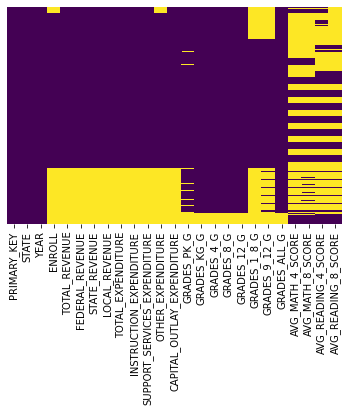

In [0]:
sns.heatmap(data2.isnull(),yticklabels=False,cbar=False,cmap='viridis') # Sarı olanlar null
plt.show()

In [0]:
data3=original_data.copy()

In [0]:
fill_list = ["ENROLL", "TOTAL_REVENUE", "FEDERAL_REVENUE",
             "STATE_REVENUE", "LOCAL_REVENUE", "TOTAL_EXPENDITURE",
             "INSTRUCTION_EXPENDITURE", "SUPPORT_SERVICES_EXPENDITURE",
             "OTHER_EXPENDITURE", "CAPITAL_OUTLAY_EXPENDITURE", "GRADES_PK_G",
             "GRADES_KG_G", "GRADES_4_G", "GRADES_8_G", "GRADES_12_G", "GRADES_1_8_G",
             "GRADES_9_12_G", "GRADES_ALL_G"]
for col in fill_list:
    data3.loc[:, col].fillna(data3.loc[:, col].interpolate(), inplace=True)

In [0]:
data3

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,nan,2678885.00,304177.00,1659028.00,715680.00,2653798.00,1481703.00,735036.00,nan,174053.00,8224.00,55460.00,57948.00,58025.00,41167.00,nan,nan,731634.00,208.00,252.00,207.00,nan
1,1992_ALASKA,ALASKA,1992,nan,1049591.00,106780.00,720711.00,222100.00,972488.00,498362.00,350902.00,nan,37451.00,2371.00,10152.00,9748.00,8789.00,6714.00,nan,nan,122487.00,nan,nan,nan,nan
2,1992_ARIZONA,ARIZONA,1992,nan,3258079.00,297888.00,1369815.00,1590376.00,3401580.00,1435908.00,1007732.00,nan,609114.00,2544.00,53497.00,55433.00,49081.00,37410.00,nan,nan,673477.00,215.00,265.00,209.00,nan
3,1992_ARKANSAS,ARKANSAS,1992,nan,1711959.00,178571.00,958785.00,574603.00,1743022.00,964323.00,483488.00,nan,145212.00,808.00,33511.00,34632.00,36011.00,27651.00,nan,nan,441490.00,210.00,256.00,211.00,nan
4,1992_CALIFORNIA,CALIFORNIA,1992,nan,26260025.00,2072470.00,16546514.00,7641041.00,27138832.00,14358922.00,8520926.00,nan,2044688.00,59067.00,431763.00,418418.00,363296.00,270675.00,nan,nan,5254844.00,208.00,261.00,202.00,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1710,2019_VIRGINIA,VIRGINIA,2019,94511.00,2044669.00,123012.00,1175899.00,745758.00,2034229.00,921494.00,585700.00,53570.00,454302.00,671.00,7469.00,7537.00,7086.00,6405.00,58998.00,27361.00,94258.00,247.00,287.00,224.00,262.00
1711,2019_WASHINGTON,WASHINGTON,2019,94511.00,2044669.00,123012.00,1175899.00,745758.00,2034229.00,921494.00,585700.00,53570.00,454302.00,671.00,7469.00,7537.00,7086.00,6405.00,58998.00,27361.00,94258.00,240.00,286.00,220.00,266.00
1712,2019_WEST_VIRGINIA,WEST_VIRGINIA,2019,94511.00,2044669.00,123012.00,1175899.00,745758.00,2034229.00,921494.00,585700.00,53570.00,454302.00,671.00,7469.00,7537.00,7086.00,6405.00,58998.00,27361.00,94258.00,231.00,272.00,213.00,256.00
1713,2019_WISCONSIN,WISCONSIN,2019,94511.00,2044669.00,123012.00,1175899.00,745758.00,2034229.00,921494.00,585700.00,53570.00,454302.00,671.00,7469.00,7537.00,7086.00,6405.00,58998.00,27361.00,94258.00,242.00,289.00,220.00,267.00


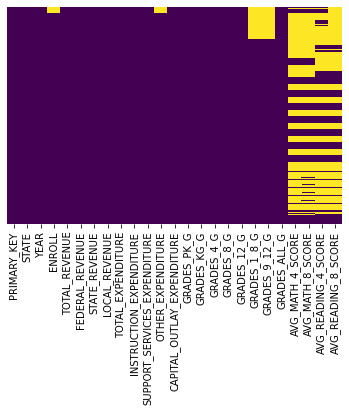

In [0]:
sns.heatmap(data3.isnull(),yticklabels=False,cbar=False,cmap='viridis') # Sarı olanlar null
plt.show()

In [0]:
fill_list = ["ENROLL", "TOTAL_REVENUE", "FEDERAL_REVENUE",
             "STATE_REVENUE", "LOCAL_REVENUE", "TOTAL_EXPENDITURE",
             "INSTRUCTION_EXPENDITURE", "SUPPORT_SERVICES_EXPENDITURE",
             "OTHER_EXPENDITURE", "CAPITAL_OUTLAY_EXPENDITURE", "GRADES_PK_G",
             "GRADES_KG_G", "GRADES_4_G", "GRADES_8_G", "GRADES_12_G", "GRADES_1_8_G",
             "GRADES_9_12_G", "GRADES_ALL_G"]
for col in fill_list:
    display("{} sütunu için istatistikler : ".format(col))
    display(pd.concat([data[col],data2[col],data3[col]], axis=1).describe())

'ENROLL sütunu için istatistikler : '

,ENROLL,ENROLL,ENROLL
count,1715.00,1224.00,1664.00
mean,917541.57,917541.57,699913.29
std,900895.59,1066514.20,984040.07
min,43866.00,43866.00,43866.00
25%,464688.00,264514.50,94511.00
50%,917541.57,649933.50,329534.50
75%,917541.57,1010532.00,876811.00
max,6307022.00,6307022.00,6307022.00


'TOTAL_REVENUE sütunu için istatistikler : '

,TOTAL_REVENUE,TOTAL_REVENUE,TOTAL_REVENUE
count,1715.00,1275.00,1715.00
mean,9102044.93,9102044.93,7291406.21
std,10138474.23,11759620.23,10596893.31
min,465650.00,465650.00,465650.00
25%,2992297.00,2189503.50,2044669.00
50%,8363904.00,5085826.00,2906573.00
75%,9102044.93,10845163.00,8165744.00
max,89217262.00,89217262.00,89217262.00


'FEDERAL_REVENUE sütunu için istatistikler : '

,FEDERAL_REVENUE,FEDERAL_REVENUE,FEDERAL_REVENUE
count,1715.00,1275.00,1715.00
mean,767779.86,767779.86,602358.37
std,988870.70,1146991.51,1028205.09
min,31020.00,31020.00,31020.00
25%,260277.00,189957.50,123012.00
50%,689072.00,403548.00,253889.00
75%,767779.86,827932.00,673280.00
max,9990221.00,9990221.00,9990221.00


'STATE_REVENUE sütunu için istatistikler : '

,STATE_REVENUE,STATE_REVENUE,STATE_REVENUE
count,1715.00,1275.00,1715.00
mean,4223742.90,4223742.90,3441788.78
std,4784665.01,5549734.82,4966475.10
min,0.00,0.00,0.00
25%,1618602.00,1165776.00,1175899.00
50%,3920971.00,2537754.00,1546921.00
75%,4223742.90,5055547.50,3837822.00
max,50904567.00,50904567.00,50904567.00


'LOCAL_REVENUE sütunu için istatistikler : '

,LOCAL_REVENUE,LOCAL_REVENUE,LOCAL_REVENUE
count,1715.00,1275.00,1715.00
mean,4110522.16,4110522.16,3247259.05
std,4732787.42,5489561.97,4955803.69
min,22093.00,22093.00,22093.00
25%,1162579.50,715121.00,745758.00
50%,3566484.00,2058996.00,1125436.00
75%,4110522.16,4755293.00,3484107.50
max,36105265.00,36105265.00,36105265.00


'TOTAL_EXPENDITURE sütunu için istatistikler : '

,TOTAL_EXPENDITURE,TOTAL_EXPENDITURE,TOTAL_EXPENDITURE
count,1715.00,1275.00,1715.00
mean,9206242.12,9206242.12,7366192.11
std,10339500.79,11992791.01,10803799.31
min,481665.00,481665.00,481665.00
25%,3004448.50,2170404.00,2034229.00
50%,8488521.00,5242672.00,2930393.00
75%,9206242.12,10744201.50,8220253.00
max,85320133.00,85320133.00,85320133.00


'INSTRUCTION_EXPENDITURE sütunu için istatistikler : '

,INSTRUCTION_EXPENDITURE,INSTRUCTION_EXPENDITURE,INSTRUCTION_EXPENDITURE
count,1715.00,1275.00,1715.00
mean,4768010.48,4768010.48,3781149.11
std,5431991.74,6300569.34,5685970.80
min,265549.00,265549.00,265549.00
25%,1570157.00,1171336.50,921494.00
50%,4224716.00,2658253.00,1534954.00
75%,4768010.48,5561959.00,4133617.50
max,43964520.00,43964520.00,43964520.00


'SUPPORT_SERVICES_EXPENDITURE sütunu için istatistikler : '

,SUPPORT_SERVICES_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE
count,1715.00,1275.00,1715.00
mean,2682586.52,2682586.52,2144609.80
std,2894398.97,3357214.50,3035900.51
min,139963.00,139963.00,139963.00
25%,899691.00,638076.00,585700.00
50%,2503616.00,1525471.00,871613.00
75%,2682586.52,3222924.50,2442635.00
max,26058021.00,26058021.00,26058021.00


'OTHER_EXPENDITURE sütunu için istatistikler : '

,OTHER_EXPENDITURE,OTHER_EXPENDITURE,OTHER_EXPENDITURE
count,1715.00,1224.00,1664.00
mean,429950.93,429950.93,330427.13
std,451742.07,534789.31,487749.61
min,11541.00,11541.00,11541.00
25%,162478.00,103449.25,53570.00
50%,429950.93,271704.00,144870.50
75%,429950.93,517222.25,418124.00
max,3995951.00,3995951.00,3995951.00


'CAPITAL_OUTLAY_EXPENDITURE sütunu için istatistikler : '

,CAPITAL_OUTLAY_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE
count,1715.00,1275.00,1715.00
mean,903467.45,903467.45,788229.67
std,1146196.24,1329473.47,1162871.17
min,12708.00,12708.00,12708.00
25%,260813.00,181507.00,260813.00
50%,828530.00,510428.00,454302.00
75%,903467.45,966148.00,812272.00
max,10223657.00,10223657.00,10223657.00


'GRADES_PK_G sütunu için istatistikler : '

,GRADES_PK_G,GRADES_PK_G,GRADES_PK_G
count,1715.00,1542.00,1715.00
mean,17840.96,17840.96,17088.77
std,28461.48,30016.60,29169.49
min,96.00,96.00,96.00
25%,2536.50,2199.75,1891.00
50%,10310.00,8258.00,7865.00
75%,19689.00,22691.75,20857.50
max,256222.00,256222.00,256222.00


'GRADES_KG_G sütunu için istatistikler : '

,GRADES_KG_G,GRADES_KG_G,GRADES_KG_G
count,1715.00,1632.00,1715.00
mean,68810.96,68810.96,65842.23
std,78693.56,80671.03,79787.67
min,5122.00,5122.00,5122.00
25%,20944.00,19029.75,13925.50
50%,51920.00,48122.00,45010.00
75%,75726.00,78864.25,75726.00
max,535379.00,535379.00,535379.00


'GRADES_4_G sütunu için istatistikler : '

,GRADES_4_G,GRADES_4_G,GRADES_4_G
count,1715.00,1632.00,1715.00
mean,69166.51,69166.51,66183.86
std,77998.00,79957.99,79112.03
min,4577.00,4577.00,4577.00
25%,20486.50,18971.50,14956.00
50%,51999.00,49087.00,46094.00
75%,77052.00,78504.25,77052.00
max,493415.00,493415.00,493415.00


'GRADES_8_G sütunu için istatistikler : '

,GRADES_8_G,GRADES_8_G,GRADES_8_G
count,1715.00,1632.00,1715.00
mean,68106.54,68106.54,65153.36
std,76054.69,77965.85,77174.47
min,3371.00,3371.00,3371.00
25%,20518.50,19594.25,14656.50
50%,50447.00,47880.00,44641.00
75%,76719.50,78976.00,76719.50
max,500143.00,500143.00,500143.00


'GRADES_12_G sütunu için istatistikler : '

,GRADES_12_G,GRADES_12_G,GRADES_12_G
count,1715.00,1632.00,1715.00
mean,58420.87,58420.87,55903.48
std,65785.42,67438.53,66726.32
min,2572.00,2572.00,2572.00
25%,17949.00,16076.50,12923.50
50%,40774.00,39408.00,38013.00
75%,68023.00,69397.25,68023.00
max,498403.00,498403.00,498403.00


'GRADES_1_8_G sütunu için istatistikler : '

,GRADES_1_8_G,GRADES_1_8_G,GRADES_1_8_G
count,1715.00,1020.00,1460.00
mean,577954.72,577954.72,421556.80
std,521061.96,675783.66,612944.43
min,37698.00,37698.00,37698.00
25%,315810.50,164925.00,58998.00
50%,577954.72,405111.50,178652.00
75%,577954.72,643975.25,530556.50
max,3929869.00,3929869.00,3929869.00


'GRADES_9_12_G sütunu için istatistikler : '

,GRADES_9_12_G,GRADES_9_12_G,GRADES_9_12_G
count,1715.00,1071.00,1460.00
mean,282069.08,282069.08,270678.50
std,261296.46,330709.79,315367.51
min,13530.00,13530.00,13530.00
25%,145790.00,80608.00,76264.36
50%,282069.08,186919.00,182621.14
75%,282069.08,322328.00,318300.25
max,2013687.00,2013687.00,2013687.00


'GRADES_ALL_G sütunu için istatistikler : '

,GRADES_ALL_G,GRADES_ALL_G,GRADES_ALL_G
count,1715.00,1632.00,1715.00
mean,913969.49,913969.49,874298.33
std,1030010.05,1055892.95,1044932.47
min,68449.00,68449.00,68449.00
25%,280001.00,248083.25,189272.00
50%,680978.00,645805.00,597096.00
75%,1002840.50,1043420.50,1002840.50
max,6441557.00,6441557.00,6441557.00
